# <span style="color:#2D7680"> Customer Behavior Analytics In Python </span>
In this project, we will analyze customer behavior in an ecommerce website,then we will recommend which banners are associated with conversion to be displayed based on our findings. 

# <span style="color:#2D7680"> Table of Contents </span>

* [1. Prepare](#Prepare)

* [2. Probability](#Probability)
   
    
* [3. Product Performance](#Product)
    
    
* [4. Conversion Duration](#Duration)
    
    
* [5. Banner Recommendation](#Recommendation)
    

* [6. Cohort Analysis](#Cohort)


* [7. A/B Testing](#Testing)


* [8. Recommendations (Act Phase)](#recommendations)

***

In [1]:
# Importing essential libraries

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as ob
import plotly.express as px

%matplotlib inline

In [2]:
#color palletes

color_blue = '#697AF5'
color_purp = '#A37DF5'
color_seblue = '#58A1E8'
light = '#EBBDFF'

colors = [color_blue,color_purp,light,color_seblue]

## <img src="https://www.svgrepo.com/show/327804/cooking-food-kitchen-meal.svg" style="width:40px; align:left;margin:0px 20px 0px 0px;">Data Preparing and Processing <a class="anchor" id="Prepare"></a> 

In [3]:
df = pd.read_csv('product.csv', parse_dates = True, infer_datetime_format = True)
df.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


In [4]:
# Dropping unuseful columns to free up memory

df.drop('page_id', axis= 1 , inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      object
 1   user_id       object
 2   product       object
 3   site_version  object
 4   time          object
 5   title         object
 6   target        int64 
dtypes: int64(1), object(6)
memory usage: 452.4+ MB


In [5]:
# Checking for nulls and duplicates
print(f"There is {df.isna().sum()} null values")
print(f"There is {df.duplicated().sum()} duplicated rows")

There is order_id        0
user_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64 null values
There is 0 duplicated rows


In [6]:
#drop duplicated rows

df.drop_duplicates()

,order_id,user_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0
...,...,...,...,...,...,...,...
8471215,70c275428b8d53eef294d0529253b694,59e736f90b5f8003072bf0eb271ddb86,accessories,desktop,2019-05-23 14:07:00,banner_show,0
8471216,94c9a2a0c11c2b88e49c13e401608c86,69d73bfcaaa83217c903627e602ae01c,clothes,mobile,2019-05-28 08:10:20,banner_show,0
8471217,862568e6013bc378b06f43c3e466521a,61728d26a9c9feb9e128c17b400062c8,sports_nutrition,mobile,2019-05-20 09:20:50,banner_show,0
8471218,7c70b42806372ba85f47a3956f23a114,f90e8c3bcf3867e65d62a2a08189a35a,sneakers,mobile,2019-05-28 19:25:42,banner_show,0


In [7]:
# Convert time column to datetime

df['time'] = pd.to_datetime(df['time'])


In [8]:
df.head()

,order_id,user_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0


In [9]:
df.user_id.nunique(),df.user_id.count()

(4254619, 8471220)

## <img src="https://www.svgrepo.com/show/239539/coin.svg" style="width:35px; align:left;margin:0px 20px 0px 0px;">Probability<a class="anchor" id="Probability"></a> 
 

Here we are going to explore different probabilities for events such as banner show, banner click and order for the two website versions.

**The proportion of users converted.**

In [10]:
df.target.value_counts('target')*100

0    97.063918
1     2.936082
Name: target, dtype: float64

**Given that an individual was in the desktop version, what is the probability they converted?**

In [11]:
df.groupby(df['site_version']).target.value_counts('target')[1]

0.055890653556508185

**Given that an individual was in the mobile version, what is the probability they converted?**

In [12]:
df.groupby(df['site_version']).target.value_counts('target')[3]

0.018977438002343826

**The probability of a customer using desktop version vs. mobile version**

In [13]:
# mobile version is represented more than desktop version 

p_version = df.site_version.value_counts(normalize= True)
p_version

mobile     0.718708
desktop    0.281292
Name: site_version, dtype: float64

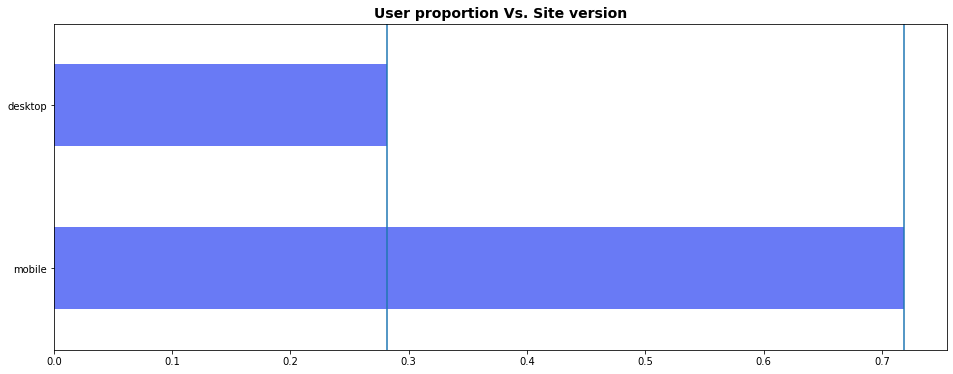

In [14]:
p_version.plot(kind= 'barh', figsize= (16,6), color = color_blue)

plt.title('User proportion Vs. Site version', fontweight= "bold", fontsize= 14)
plt.axvline(p_version[1])
plt.axvline(p_version[0])

**Under different events, what are the user percentages for both website and mobile versions**

In [15]:
#Given that mobile version is way more represented than desktop version,  we will use proportions instead.

rates = (df.groupby(['site_version']).title.value_counts('site_version')*100).unstack()
rates

title,banner_click,banner_show,order
site_version,,,
desktop,4.828810,89.582124,5.589065
mobile,11.729299,86.372957,1.897744


Text(0, 0.5, 'Percentage User')

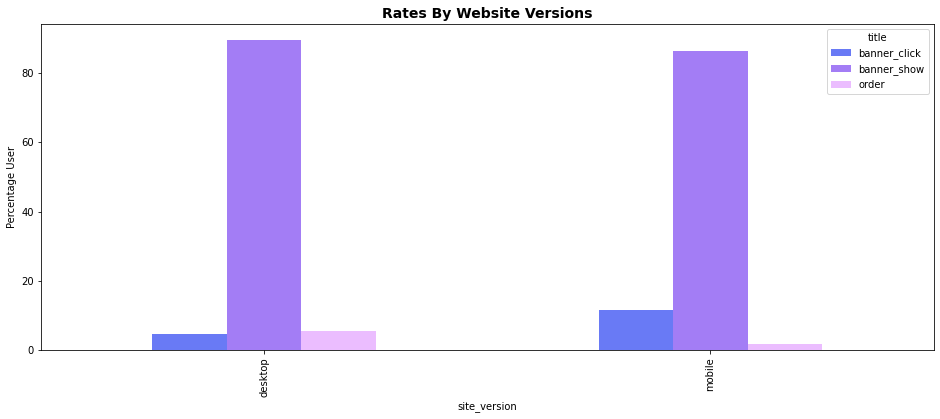

In [16]:
rates.plot(kind= 'bar' , figsize = (16,6),color = colors)

plt.title('Rates By Website Versions',fontweight="bold",size=14)
plt.ylabel('Percentage User')

In [17]:
# Splitting the data based on site version
desk = df[df['site_version'] == 'desktop']
mob = df[df['site_version'] == 'mobile']

In [18]:
#desktop conversion rate
desk[desk['title'] == 'order'].shape[0]/desk[desk['title'] == 'banner_click'].shape[0]

1.1574414461391387

In [19]:
#mobile conversion rate
mob[mob['title'] == 'order'].shape[0]/mob[mob['title'] == 'banner_click'].shape[0]

0.1617951629910421

>**Note**: 
- Banner clicks in mobile version are higher than desktop version
- Despite the previous observation, $CR_{desk} > 1$ which means that the number of orders exceeds the number of clicks 

In [20]:
df.head()

,order_id,user_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0


In [21]:
df['product'].value_counts(normalize= True)

clothes             0.210883
company             0.203637
sneakers            0.201074
sports_nutrition    0.192962
accessories         0.191443
Name: product, dtype: float64

In [22]:
# Split the data into converted and non converted

converted = df.query('target == 1')
converted.head()


,order_id,user_id,product,site_version,time,title,target
60,072b030ba126b2f4b2374f342be9ed44,3c59dc048e8850243be8079a5c74d079,sports_nutrition,desktop,2019-03-03 10:15:41,order,1
106,f0935e4cd5920aa6c7c996a5ee53a70f,1c383cd30b7c298ab50293adfecb7b18,sneakers,desktop,2019-02-08 21:16:48,order,1
107,a97da629b098b75c294dffdc3e463904,1c383cd30b7c298ab50293adfecb7b18,clothes,desktop,2019-02-10 19:12:07,order,1
165,9766527f2b5d3e95d4a733fcfb77bd7e,d82c8d1619ad8176d665453cfb2e55f0,sports_nutrition,mobile,2019-02-06 10:32:36,order,1
179,8f53295a73878494e9bc8dd6c3c7104f,b53b3a3d6ab90ce0268229151c9bde11,accessories,mobile,2019-02-10 19:18:02,order,1


In [23]:
converted.groupby('site_version').product.value_counts(normalize= True).unstack()

product,accessories,clothes,sneakers,sports_nutrition
site_version,,,,
desktop,0.166097,0.502902,0.244517,0.086484
mobile,0.194130,0.395859,0.304256,0.105755


Text(0, 0.5, 'Percentage User')

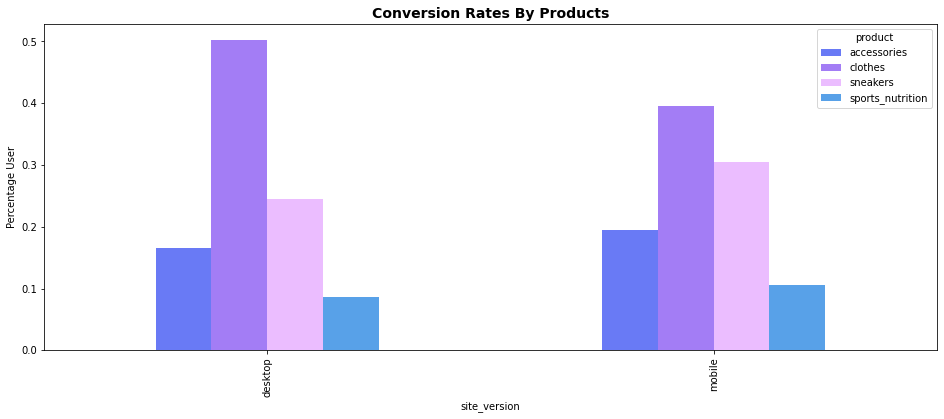

In [24]:
converted.groupby('site_version').product.value_counts(normalize= True).unstack().plot(kind= 'bar', figsize= (16,6), color = colors)
plt.title('Conversion Rates By Products',fontweight="bold",size=14)
plt.ylabel('Percentage User')

## <img src="https://www.svgrepo.com/show/34865/clothes.svg" style="width:35px; align:left;margin:0px 20px 0px 0px;"> Product Performance <a class="anchor" id="Product"></a> 

#### Banner Clicks

In [25]:
prod_trends = df.copy()
prod_trends['date'] = prod_trends['time'].dt.date
prod_trends['weekday'] = prod_trends['time'].dt.day_name()
prod_trends['hour'] = prod_trends['time'].dt.hour

prod_trends.head()

,order_id,user_id,product,site_version,time,title,target,date,weekday,hour
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0,2019-01-11,Friday,9
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0,2019-01-09,Wednesday,9
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0,2019-01-09,Wednesday,9
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0,2019-01-03,Thursday,8
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0,2019-01-03,Thursday,8


In [26]:
mobile = prod_trends[prod_trends['site_version'] == 'mobile']
desk = prod_trends[prod_trends['site_version'] == 'desktop']
desk.head()

,order_id,user_id,product,site_version,time,title,target,date,weekday,hour
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0,2019-01-11,Friday,9
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0,2019-01-09,Wednesday,9
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0,2019-01-09,Wednesday,9
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0,2019-01-03,Thursday,8
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0,2019-01-03,Thursday,8


In [27]:
mob_clicks = mobile[mobile['title'] == 'banner_click']
mobile_prod = mob_clicks.groupby(['date','product']).user_id.agg('nunique')
mobile_prod_df = pd.DataFrame(mobile_prod.unstack(level = 1))

desk_clicks = desk[desk['title'] == 'banner_click']
desk_prod = desk_clicks.groupby(['date','product']).user_id.agg('nunique')
desk_prod_df = pd.DataFrame(desk_prod.unstack(level = 1))

desk_prod_df.head()

product,accessories,clothes,company,sneakers,sports_nutrition
date,,,,,
2019-01-01,80,105,95,81,55
2019-01-02,72,112,116,102,52
2019-01-03,72,145,109,106,57
2019-01-04,91,147,114,97,66
2019-01-05,78,177,121,114,70


In [28]:
# This finction makes 2 trendline plots at once
def trend_time(data_1, data_2):
    plt.figure(1)

    data_1.plot(figsize = (12,6),color= colors)
    title_1= str(input("title")).title()
    xlabels = str(input("xlable")).title()
    ylabels = str(input("ylabel")).title()
    plt.title(title_1, fontsize = 20, fontweight = 'bold')
    plt.xlabel(xlabels,fontweight = 'bold')
    plt.ylabel(ylabels,fontweight = 'bold')

    plt.figure(2)
    data_2.plot(figsize = (12,6), color= colors)
    title_2= str(input("title")).title()
    plt.title(title_2, fontsize = 20, fontweight = 'bold')
    plt.xlabel(xlabels,fontweight = 'bold')
    plt.ylabel(ylabels,fontweight = 'bold')

    
    plt.show

In [29]:
#plot_function

#trend_time(mobile_prod_df,desk_prod_df)


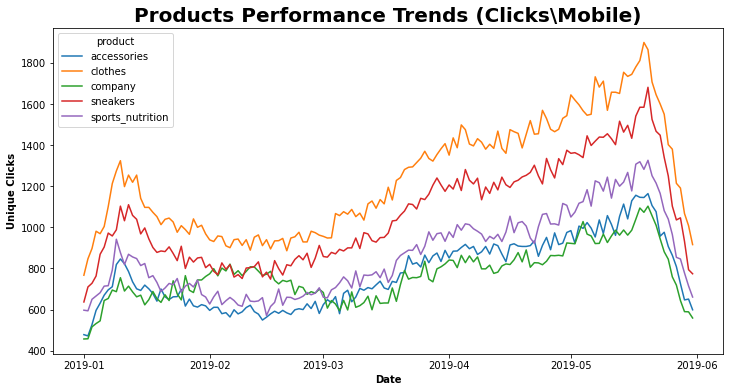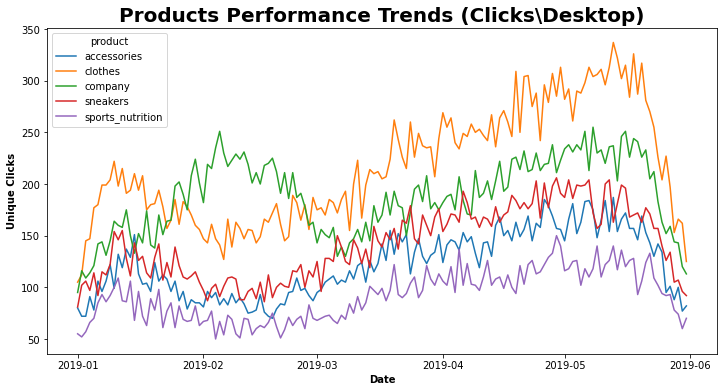

* The number of clicks increased significantly from March 2019 and had their peak towards June 2019. In cases like this, it's really usefull to take a look at historical data, so we can be sure whether this increase is due to growth or it's just a Seasonality effect.
* Around Feb 2019, increased clicks on Company banner are observed, the peak exists in both versions, but it's much more prominant in the desktop version

#### Purchases

In [30]:
mobile_orders = mobile[mobile['target'] == 1]
mobile_orders_prod =mobile.groupby(['date','product']).order_id.agg('nunique')
mobile_orders_prod_df = pd.DataFrame(mobile_orders_prod.unstack(level=1))

desk_orders = desk[desk['target'] == 1]
desk_orders_prod =desk.groupby(['date','product']).order_id.agg('nunique')
desk_orders_prod_df = pd.DataFrame(desk_orders_prod.unstack(level=1))


In [31]:
#trend_time(mobile_orders_prod_df,desk_orders_prod_df)

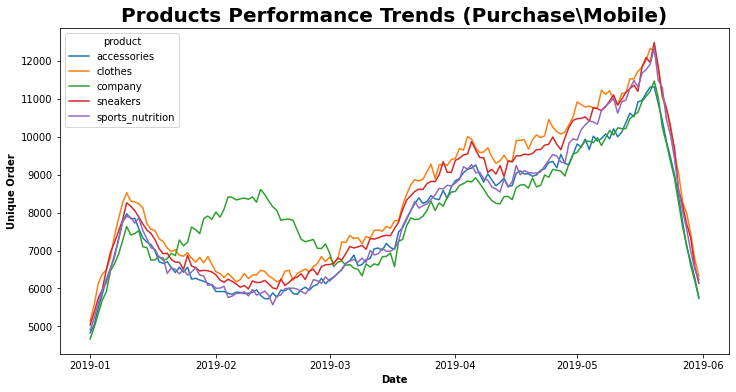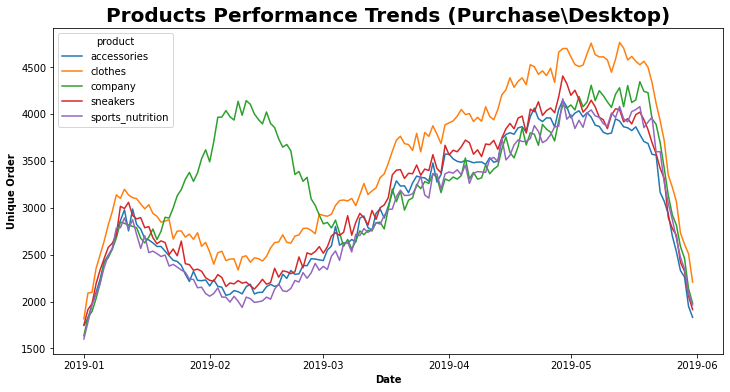

* the same patterns are observed. 

#### Seasonality analysis

In [32]:
# Sort the data by Id and Event Date

df_sorted = df.sort_values(['user_id','time'], ascending = True)

In [33]:
import datetime as dt
def get_mon (x):
    return dt.datetime(x.year, x.month,1)

In [34]:
s_df = df_sorted.copy()

s_df['weekday'] = s_df['time'].dt.weekday

In [35]:
s_df_desktop = s_df[s_df['site_version'] == 'desktop']
s_df_mob = s_df[s_df['site_version'] == 'mobile']

In [36]:
s_df_desktop['event_month'] = s_df_desktop['time'].apply(get_mon)
s_df_mob['event_month'] = s_df_mob['time'].apply(get_mon)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
s_df_mob['acquired_date'] = s_df_mob.groupby('user_id')['event_month'].transform('min')
s_df_mob.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_id,user_id,product,site_version,time,title,target,weekday,event_month,acquired_date
8085897,7628fb882a96b42d8bbfa1ecd2932599,000009891526c0ade7180f8423792063,sneakers,mobile,2019-05-26 06:40:32,banner_show,0,6,2019-05-01,2019-05-01
6299880,1364bf655cee9a2c7945425fd159aafb,0000174d1d38072889d47e51b587a10c,sports_nutrition,mobile,2019-05-19 08:59:48,banner_show,0,6,2019-05-01,2019-05-01
6299879,7dd2370a64ec85dd99138973bcf2f2a7,0000174d1d38072889d47e51b587a10c,company,mobile,2019-05-21 12:45:51,banner_show,0,1,2019-05-01,2019-05-01
1756225,09d2a46d23d30f968c63ef175a942677,0000193a728fd00b6cff91b8840bbf8d,accessories,mobile,2019-01-15 06:02:30,banner_show,0,1,2019-01-01,2019-01-01
1756223,462650e4212d0e17a8c8711953fc7fda,0000193a728fd00b6cff91b8840bbf8d,accessories,mobile,2019-01-18 11:37:02,banner_show,0,4,2019-01-01,2019-01-01


Text(0, 0.5, 'Number Of Unique Orders')

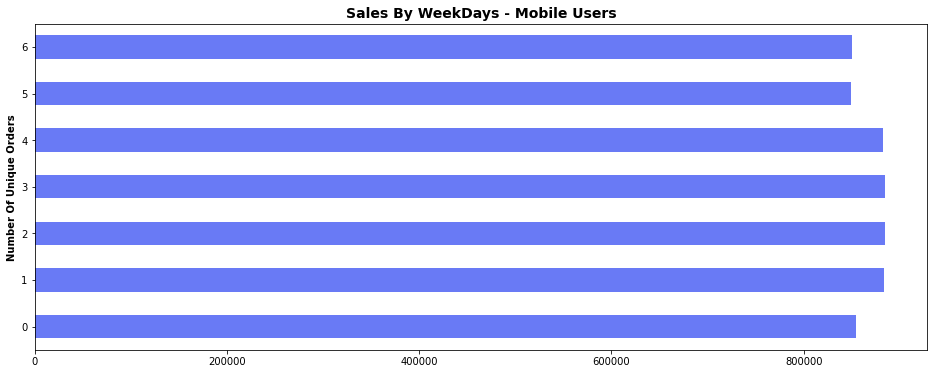

In [38]:
day_mob = s_df_mob.groupby('weekday').order_id.nunique()
day_mob.plot(kind = 'barh', figsize= (16,6), color= color_blue)
plt.title('Sales By WeekDays - Mobile Users',fontweight="bold",size=14)
plt.ylabel('Number Of Unique Orders',fontweight = 'bold')

Text(0, 0.5, 'Number Of Unique Orders')

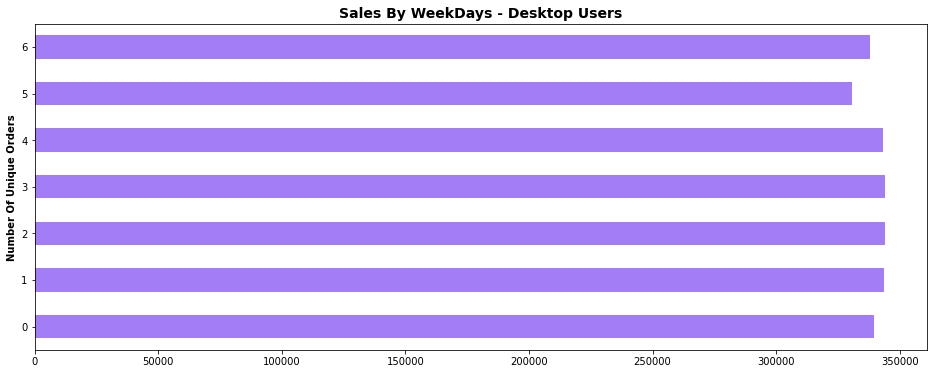

In [39]:
day_desk = s_df_desktop.groupby('weekday').order_id.nunique()
day_desk.plot(kind = 'barh', figsize= (16,6),color= color_purp)
plt.title('Sales By WeekDays - Desktop Users',fontweight="bold",size=14)
plt.ylabel('Number Of Unique Orders',fontweight = 'bold')

In [40]:
# Because users made multiple events, we will aggregate by user id and date, to get if the user converted in a certain month or not
purchases_desk = s_df_desktop.groupby(['user_id','event_month']).agg({'target' : ['sum']})
purchases_desk.columns = purchases_desk.columns.droplevel(level=1)
purchases_desk.reset_index(inplace = True)
purchases_desk.head()

purchases_mob = s_df_mob.groupby(['user_id','event_month']).agg({'target' : ['sum']})
purchases_mob.columns = purchases_mob.columns.droplevel(level=1)
purchases_mob.reset_index(inplace = True)
purchases_mob.head()

,user_id,event_month,target
0,000009891526c0ade7180f8423792063,2019-05-01,0
1,0000174d1d38072889d47e51b587a10c,2019-05-01,0
2,0000193a728fd00b6cff91b8840bbf8d,2019-01-01,0
3,00002783bc5d108510f3f9666c8b1edd,2019-03-01,0
4,00002eb25d60a09c318efbd0797bffb5,2019-05-01,0


In [41]:
purchases_desk = purchases_desk.groupby('event_month').agg({'target' : ['mean']})
purchases_desk.columns = purchases_desk.columns.droplevel(level=1)
purchases_desk.reset_index(inplace = True)
purchases_desk

purchases_mob = purchases_mob.groupby('event_month').agg({'target' : ['mean']})
purchases_mob.columns = purchases_mob.columns.droplevel(level=1)
purchases_mob.reset_index(inplace = True)
purchases_mob

,event_month,target
0,2019-01-01,0.028331
1,2019-02-01,0.036937
2,2019-03-01,0.036306
3,2019-04-01,0.036577
4,2019-05-01,0.029672


In [42]:
conv_mob = s_df_mob.set_index('time').groupby(
    pd.Grouper(freq='M')
).agg({'target' : ['mean']}).reset_index()



conv_desk = s_df_desktop.set_index('time').groupby(
    pd.Grouper(freq='M')
).agg({'target' : ['mean']}).reset_index()

In [43]:
conv_desk

,time,target
,,mean
0,2019-01-31,0.046406
1,2019-02-28,0.065241
2,2019-03-31,0.061764
3,2019-04-30,0.059469
4,2019-05-31,0.048188


Text(0, 0.5, 'Conversion Rates')

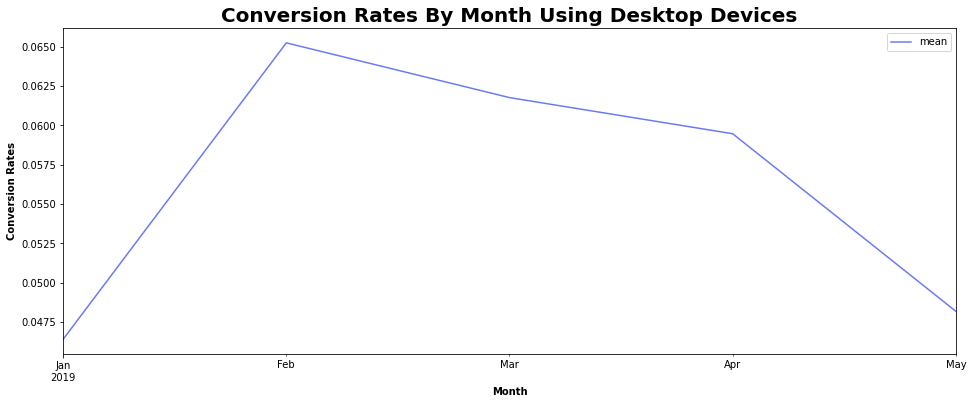

In [44]:
conv_desk.plot(x= 'time',
               y= 'target', figsize= (16,6), color = colors)
plt.title("Conversion Rates By Month Using Desktop Devices", fontsize = 20, fontweight = 'bold')
plt.xlabel('Month',fontweight = 'bold')
plt.ylabel('Conversion Rates',fontweight = 'bold')

Text(0, 0.5, 'Conversion Rates')

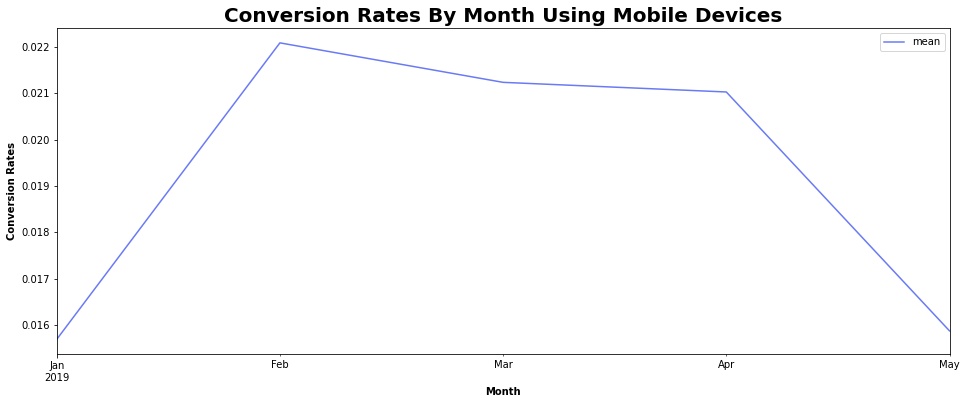

In [45]:
conv_mob.plot(x= 'time',y= 'target', figsize= (16,6), color = colors)
plt.title("Conversion Rates By Month Using Mobile Devices", fontsize = 20, fontweight = 'bold')
plt.xlabel('Month',fontweight = 'bold')
plt.ylabel('Conversion Rates',fontweight = 'bold')

* Conversion rates reaches a peak for both versions at the month of Feb, the decrease is steeper in the case of desktop users towards Mar. conversion rate increase again at the month of Apr for both versions, but it's more prominent in mobile version users. 

## <img src="https://www.svgrepo.com/show/348820/time.svg" style="width:30px; align:left;margin:0px 20px 0px 0px;">The Mean Duration Customer Takes To Convert <a class="anchor" id="Duration"></a> 



In [46]:
# New column 'events' to calculate the count of events a user made

df_sorted['events'] = df_sorted.groupby('user_id')['user_id'].transform('count')
df_sorted.head()

,order_id,user_id,product,site_version,time,title,target,events
5169060,eb57f32a646ec2bd9c6725a85e8bc03b,0000023f507999464aa2b78875b7e5d6,accessories,desktop,2019-05-14 18:00:05,banner_show,0,1
8085897,7628fb882a96b42d8bbfa1ecd2932599,000009891526c0ade7180f8423792063,sneakers,mobile,2019-05-26 06:40:32,banner_show,0,1
6244959,275d2d45916c32c74e32893af200be9c,00000ce845c00cbf0686c992fc369df4,clothes,desktop,2019-04-27 14:02:23,banner_show,0,1
3868750,998ee74e3a33dfd9eb57de4451f3e4a2,00000f7264c27ba6fea0c837ed6aa0aa,sneakers,desktop,2019-05-19 16:38:05,banner_show,0,1
1986001,14790ffc07acd5a7e74db60c0fde7410,0000104cd168386a335ba6bf6e32219d,accessories,desktop,2019-01-22 12:41:53,banner_show,0,4


In [47]:
# Selecting the subset of users with multiple events

multiple_events = df_sorted[df_sorted['events'] > 1]
multiple_events.head()

,order_id,user_id,product,site_version,time,title,target,events
1986001,14790ffc07acd5a7e74db60c0fde7410,0000104cd168386a335ba6bf6e32219d,accessories,desktop,2019-01-22 12:41:53,banner_show,0,4
1986002,1a27283963e6865b708f2a902b6dd909,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-03-22 15:22:01,banner_show,0,4
1986003,7cb81abefe28c25433fcf062c6122b9e,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-03-22 15:23:33,banner_click,0,4
1986004,7c7ffb8a8c0a6b5347977fa5ed6a4589,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-04-12 23:15:50,order,1,4
6299880,1364bf655cee9a2c7945425fd159aafb,0000174d1d38072889d47e51b587a10c,sports_nutrition,mobile,2019-05-19 08:59:48,banner_show,0,2


In [48]:
# New column for calculating the time between user events

multiple_events['duration'] = multiple_events.groupby('user_id')['time']\
                                .transform('diff').dt.days\
                                .fillna(0)

# Selecting users whom converted

multiple_events_converted = multiple_events[multiple_events['target']== 1]
multiple_events_converted.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,order_id,user_id,product,site_version,time,title,target,events,duration
1986004,7c7ffb8a8c0a6b5347977fa5ed6a4589,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-04-12 23:15:50,order,1,4,21.0
6087336,565bd2e388b2e8474e316d66871823b5,00005c2d819c584e32298f8729c4b1d7,sneakers,desktop,2019-04-02 13:02:07,order,1,2,0.0
8184715,477cb3c9825a5b6624619ff424015937,0000c0bdc0f15bd239cfffa884791a10,accessories,mobile,2019-05-14 08:04:47,order,1,3,24.0
2665746,4af60ec1930281d5c7e191c9e029c004,000112b726022eb7e0b4668544e19220,sports_nutrition,desktop,2019-03-19 10:43:12,order,1,3,26.0
1786520,501c09625457a1c756ab847c6118fb28,0001181bf1ad8f82dcf59c7c18343bd5,sneakers,mobile,2019-02-26 23:25:04,order,1,3,17.0


In [49]:
# This function removes outliers

def truncated_mean(data):
    top = data.quantile(.9)
    low = data.quantile(.1)
    
    trunc_data= data[(data <= top) & (data >= low)]
    mean = trunc_data.mean()
    return(mean)


In [50]:
# Calculating conversion duration mean and median for each site version
multiple_events_converted.groupby('site_version').duration.agg(['mean','median',truncated_mean])

,mean,median,truncated_mean
site_version,,,
desktop,7.897027,3.0,5.320982
mobile,7.331250,2.0,4.817224


In [51]:
valse = pd.DataFrame(multiple_events_converted.duration.value_counts().reset_index())
valse.sort_values('duration', ascending = False)
valse.columns = ['days_to_convert','user_count']
valse.head()

,days_to_convert,user_count
0,0.0,106695
1,1.0,9543
2,2.0,8642
3,3.0,7905
4,4.0,7280


In [52]:
def plot_graph(data,col1,col2):
    
    data.plot(x= col1, y = col2,figsize= (16,8),color= colors)
    plt.title(col1.replace('_',' ') + ' Vs '+ col2.replace('_',' '), fontsize = 20, fontweight = 'bold')
    plt.xlabel(col1.replace('_',' '),fontweight = 'bold')
    plt.ylabel(col2.replace('_',' '),fontweight = 'bold')
    plt.show

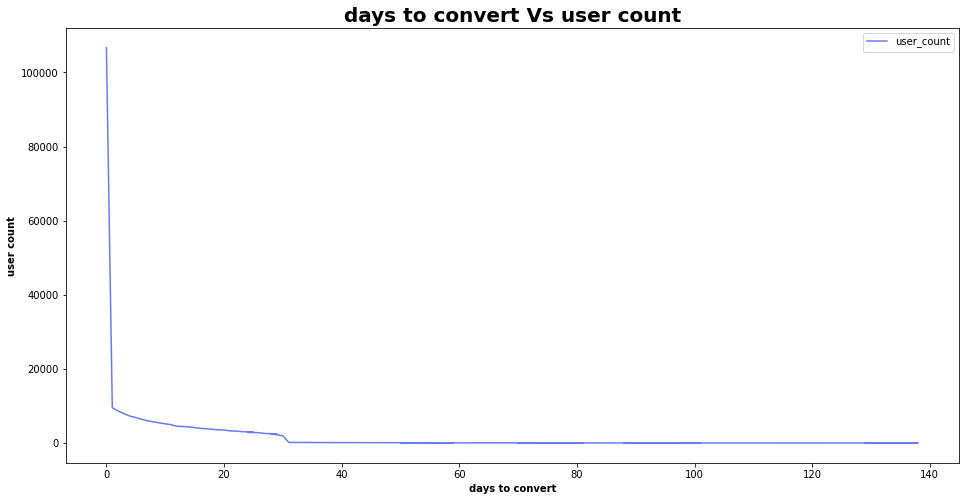

In [53]:
plot_graph(valse,'days_to_convert','user_count')

>**Note** <br>  Most of the users take from 0 to 3 days to convert. during which, retargeting campaigns would be appropriate to help increasing conversion rate. 

## <img src="https://www.svgrepo.com/show/334327/trip.svg" style="width:30px; align:left;margin:0px 20px 0px 0px;">Which Banner Show / Click Is Driving More Conversions <a class="anchor" id="Recommendation"></a> 

The below code is used to analyze user behavior data in order to understand the events that occurred before a conversion. This information can be valuable for businesses looking to optimize their marketing strategies and improve their conversion rates.

By identifying the events that occurred immediately before a conversion, businesses can gain insight into what factors or behaviors may have influenced the user to make a purchase. This information can then be used to adjust marketing tactics or website design in order to better cater to user preferences and increase the likelihood of future conversions.

The code can also be used to identify patterns in user behavior that can be used to create personalized recommendations or targeted advertising.

In [54]:
# This gets the action row before conversion

converted = multiple_events.loc[multiple_events['target'] == 1]
prior_conv = multiple_events.loc[multiple_events['target'].shift(-1) == 1]
merged = converted.merge(prior_conv , how = 'outer', sort = True)
merged['event_product'] = merged['title'] + '_on_' + merged['product']
merged.head()

,order_id,user_id,product,site_version,time,title,target,events,duration,event_product
0,0000180e94707c0d90547614c17076bf,389669ebdb50615ed432a723da11c9c6,sports_nutrition,mobile,2019-01-16 01:08:13,banner_show,0,6,9.0,banner_show_on_sports_nutrition
1,0000702ee4cefdb1e7f89084e50d3c85,e76afd80a09bac5ac3395fbaa1dab688,sports_nutrition,mobile,2019-05-24 10:15:59,banner_show,0,2,140.0,banner_show_on_sports_nutrition
2,00009007251e61c2ef9184d4b6e6eeec,15c74b74f300f094c0259b3402de9db2,sports_nutrition,desktop,2019-04-22 16:59:29,order,1,3,0.0,order_on_sports_nutrition
3,0000c0bdc0f15bd239cfffa884791a10,03f8fc4dcfdebb0841d33df070f1899a,clothes,desktop,2019-04-02 07:37:53,order,1,4,29.0,order_on_clothes
4,0000d87a4ed677a8e96236ca7cd84567,a2ae80985f780f6c52503a2e5ca099a6,clothes,desktop,2019-02-01 15:13:49,order,1,2,23.0,order_on_clothes


In [55]:
actions = pd.DataFrame(merged.groupby('user_id').event_product.unique().reset_index())
journey = actions['event_product']

journey = list(journey)

In [56]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(journey)

# One-hot encode transactions
onehot = encoder.transform(journey)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.head()

,banner_click_on_accessories,banner_click_on_clothes,banner_click_on_company,banner_click_on_sneakers,banner_click_on_sports_nutrition,banner_show_on_accessories,banner_show_on_clothes,banner_show_on_company,banner_show_on_sneakers,banner_show_on_sports_nutrition,order_on_accessories,order_on_clothes,order_on_sneakers,order_on_sports_nutrition
0,False,True,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,True


In [57]:
onehot.mean()

banner_click_on_accessories         0.031024
banner_click_on_clothes             0.050261
banner_click_on_company             0.038926
banner_click_on_sneakers            0.040467
banner_click_on_sports_nutrition    0.031598
banner_show_on_accessories          0.105253
banner_show_on_clothes              0.102227
banner_show_on_company              0.134596
banner_show_on_sneakers             0.102370
banner_show_on_sports_nutrition     0.106301
order_on_accessories                0.136906
order_on_clothes                    0.342101
order_on_sneakers                   0.207458
order_on_sports_nutrition           0.073193
dtype: float64

In [58]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.006, 
                            use_colnames = True)

In [59]:
frequent_itemsets.head(10)

,support,itemsets
0,0.031024,(banner_click_on_accessories)
1,0.050261,(banner_click_on_clothes)
2,0.038926,(banner_click_on_company)
3,0.040467,(banner_click_on_sneakers)
4,0.031598,(banner_click_on_sports_nutrition)
5,0.105253,(banner_show_on_accessories)
6,0.102227,(banner_show_on_clothes)
7,0.134596,(banner_show_on_company)
8,0.102370,(banner_show_on_sneakers)
9,0.106301,(banner_show_on_sports_nutrition)


In [60]:
print(len(frequent_itemsets)),print(len(onehot.columns))

46
14


(None, None)

In [61]:
#Import association rules for more filtration 
from mlxtend.frequent_patterns import association_rules

rules_1 = association_rules(frequent_itemsets, 
                            metric = "support", 
                             min_threshold = 0.0015)

rules_1.sort_values(['support','confidence'], ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(banner_show_on_company),(order_on_clothes),0.134596,0.342101,0.050943,0.378487,1.106360,0.004897,1.058544
41,(order_on_clothes),(banner_show_on_company),0.342101,0.134596,0.050943,0.148912,1.106360,0.004897,1.016820
32,(banner_show_on_clothes),(order_on_clothes),0.102227,0.342101,0.029957,0.293049,0.856616,-0.005014,0.930615
33,(order_on_clothes),(banner_show_on_clothes),0.342101,0.102227,0.029957,0.087569,0.856616,-0.005014,0.983936
56,(banner_show_on_sports_nutrition),(order_on_clothes),0.106301,0.342101,0.029409,0.276657,0.808699,-0.006957,0.909525


In [62]:
#Getting only the antecedents that predicts a conversion on clothes products
targeted_rules = rules_1[(rules_1['consequents'] == {'order_on_clothes'})].copy()
targeted_rules_acc = rules_1[(rules_1['consequents'] == {'order_on_accessories'})].copy()
targeted_rules_sn = rules_1[(rules_1['consequents'] == {'order_on_sneakers'})].copy()
targeted_rules_co = rules_1[(rules_1['consequents'] == {'order_on_company'})].copy()
ttargeted_rules_sn = rules_1[(rules_1['consequents'] == {'order_on_sports_nutrition'})].copy()
ttargeted_rules_sn.sort_values(['support','confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(banner_show_on_company),(order_on_sports_nutrition),0.134596,0.073193,0.007840,0.058252,0.795862,-0.002011,0.984134
61,(banner_show_on_sports_nutrition),(order_on_sports_nutrition),0.106301,0.073193,0.007596,0.071454,0.976231,-0.000185,0.998126
29,(banner_show_on_accessories),(order_on_sports_nutrition),0.105253,0.073193,0.006907,0.065626,0.896611,-0.000796,0.991901
53,(banner_show_on_sneakers),(order_on_sports_nutrition),0.102370,0.073193,0.006737,0.065809,0.899107,-0.000756,0.992095
37,(banner_show_on_clothes),(order_on_sports_nutrition),0.102227,0.073193,0.006709,0.065627,0.896633,-0.000773,0.991903


In [63]:
#Further filtration to see more accurate results with high support and confidence and lower randomness
filtered_rules = targeted_rules_sn[(targeted_rules_sn['antecedent support']> 0.01)&
                               (targeted_rules_sn['support']> 0.009)&
                               (targeted_rules_sn['confidence']> 0.10)]

filtered_rules.sort_values(['support','confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42,(banner_show_on_company),(order_on_sneakers),0.134596,0.207458,0.022281,0.165542,0.797954,-0.005642,0.949769
27,(banner_show_on_accessories),(order_on_sneakers),0.105253,0.207458,0.019739,0.187541,0.903993,-0.002096,0.975485
59,(banner_show_on_sports_nutrition),(order_on_sneakers),0.106301,0.207458,0.019674,0.185079,0.892130,-0.002379,0.972539
34,(banner_show_on_clothes),(order_on_sneakers),0.102227,0.207458,0.019147,0.187299,0.902829,-0.002061,0.975195
51,(banner_show_on_sneakers),(order_on_sneakers),0.102370,0.207458,0.018728,0.182950,0.881864,-0.002509,0.970004
9,(banner_click_on_clothes),(order_on_sneakers),0.050261,0.207458,0.010838,0.215643,1.039453,0.000411,1.010435


In [64]:
data_list = [targeted_rules,targeted_rules_acc,targeted_rules_sn,targeted_rules_co,ttargeted_rules_sn]

def filter_rules(data):
        
    for x in data:

        filtered_rules = x[(x['antecedent support']> 0.01)&
                                    (x['support']> 0.009)&
                                    (x['confidence']> 0.10)]

        return (display(data[0].sort_values(['support','confidence'], ascending=False).head()),
                display(data[1].sort_values(['support','confidence'], ascending=False).head()),
                display(data[2].sort_values(['support','confidence'], ascending=False).head()),
                display(data[3].sort_values(['support','confidence'], ascending=False).head()),
                display(data[4].sort_values(['support','confidence'], ascending=False).head()))

In [65]:
filter_rules(data_list)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(banner_show_on_company),(order_on_clothes),0.134596,0.342101,0.050943,0.378487,1.106360,0.004897,1.058544
32,(banner_show_on_clothes),(order_on_clothes),0.102227,0.342101,0.029957,0.293049,0.856616,-0.005014,0.930615
56,(banner_show_on_sports_nutrition),(order_on_clothes),0.106301,0.342101,0.029409,0.276657,0.808699,-0.006957,0.909525
24,(banner_show_on_accessories),(order_on_clothes),0.105253,0.342101,0.028702,0.272695,0.797119,-0.007305,0.904571
48,(banner_show_on_sneakers),(order_on_clothes),0.102370,0.342101,0.028550,0.278892,0.815232,-0.006471,0.912344


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(banner_show_on_company),(order_on_accessories),0.134596,0.136906,0.014735,0.109478,0.799660,-0.003692,0.969200
23,(banner_show_on_accessories),(order_on_accessories),0.105253,0.136906,0.013334,0.126686,0.925352,-0.001076,0.988298
55,(banner_show_on_sports_nutrition),(order_on_accessories),0.106301,0.136906,0.012860,0.120975,0.883637,-0.001693,0.981877
31,(banner_show_on_clothes),(order_on_accessories),0.102227,0.136906,0.012813,0.125341,0.915527,-0.001182,0.986778
47,(banner_show_on_sneakers),(order_on_accessories),0.102370,0.136906,0.012714,0.124197,0.907173,-0.001301,0.985489


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42,(banner_show_on_company),(order_on_sneakers),0.134596,0.207458,0.022281,0.165542,0.797954,-0.005642,0.949769
27,(banner_show_on_accessories),(order_on_sneakers),0.105253,0.207458,0.019739,0.187541,0.903993,-0.002096,0.975485
59,(banner_show_on_sports_nutrition),(order_on_sneakers),0.106301,0.207458,0.019674,0.185079,0.892130,-0.002379,0.972539
34,(banner_show_on_clothes),(order_on_sneakers),0.102227,0.207458,0.019147,0.187299,0.902829,-0.002061,0.975195
51,(banner_show_on_sneakers),(order_on_sneakers),0.102370,0.207458,0.018728,0.182950,0.881864,-0.002509,0.970004


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(banner_show_on_company),(order_on_sports_nutrition),0.134596,0.073193,0.007840,0.058252,0.795862,-0.002011,0.984134
61,(banner_show_on_sports_nutrition),(order_on_sports_nutrition),0.106301,0.073193,0.007596,0.071454,0.976231,-0.000185,0.998126
29,(banner_show_on_accessories),(order_on_sports_nutrition),0.105253,0.073193,0.006907,0.065626,0.896611,-0.000796,0.991901
53,(banner_show_on_sneakers),(order_on_sports_nutrition),0.102370,0.073193,0.006737,0.065809,0.899107,-0.000756,0.992095
37,(banner_show_on_clothes),(order_on_sports_nutrition),0.102227,0.073193,0.006709,0.065627,0.896633,-0.000773,0.991903


(None, None, None, None, None)

#### Heatmap Visualising The Relationships

In [66]:
rules_1['antecedents'] = rules_1['antecedents'].apply(lambda a: ','.join(list(a)))
rules_1['consequents'] = rules_1['consequents'].apply(lambda a: ','.join(list(a)))
rules_1[['antecedents','consequents']]

,antecedents,consequents
0,banner_click_on_accessories,order_on_clothes
1,order_on_clothes,banner_click_on_accessories
2,banner_click_on_accessories,order_on_sneakers
3,order_on_sneakers,banner_click_on_accessories
4,order_on_accessories,banner_click_on_clothes
...,...,...
59,banner_show_on_sports_nutrition,order_on_sneakers
60,order_on_sports_nutrition,banner_show_on_sports_nutrition
61,banner_show_on_sports_nutrition,order_on_sports_nutrition
62,order_on_sneakers,order_on_clothes


<function matplotlib.pyplot.show(close=None, block=None)>

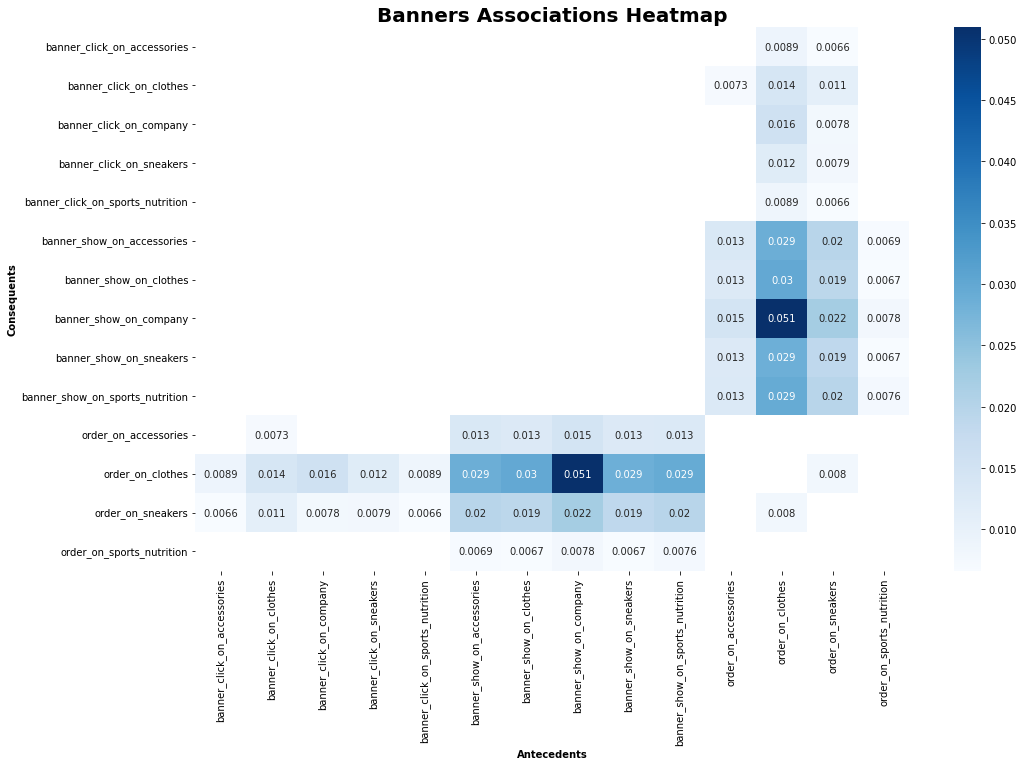

In [67]:
support_table = rules_1.pivot(index = 'consequents', columns = 'antecedents', values = 'support')

plt.figure(figsize = (16,10))

sns.heatmap(support_table, annot= True, cmap= 'Blues')
plt.title("Banners Associations Heatmap", fontsize = 20, fontweight = 'bold')
plt.xlabel('Antecedents',fontweight = 'bold')
plt.ylabel('Consequents',fontweight = 'bold')
plt.show

In [68]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets_2 = apriori(onehot, 
                            min_support = 0.020, 
                            use_colnames = True,
                            max_len = 2)

In [69]:
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = "support", 
                            min_threshold = 0.00)

In [70]:
rules_2['antecedents'] = rules_2['antecedents'].apply(lambda a: list(a)[0])
rules_2['consequents'] = rules_2['consequents'].apply(lambda a: list(a)[0])
rules_2['rule'] = rules_2.index

coords = rules_2[['antecedents','consequents','rule']]
coords.head(2)

,antecedents,consequents,rule
0,banner_show_on_accessories,order_on_clothes,0
1,order_on_clothes,banner_show_on_accessories,1


<function matplotlib.pyplot.show(close=None, block=None)>

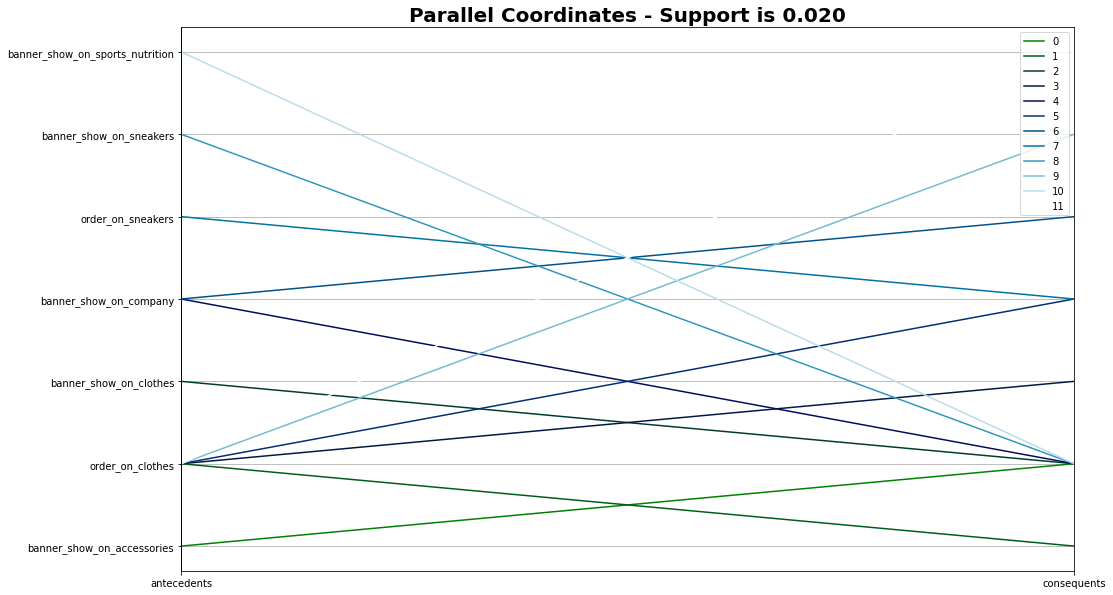

In [71]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize = (16,10))
parallel_coordinates(coords, 'rule',colormap= 'ocean')
plt.title("Parallel Coordinates - Support is 0.020", fontsize = 20, fontweight = 'bold')

plt.show

#### From the plots above we conclude:

* As we see here that **banner_show_on_company** and **banner_show_on_clothes** are strongly associated with users conversion on **clothing products**
* The darker the color in the heatmap, the stronger the association between the actions, for example **banner_show_on_company** also is associated with ordering **sneakers.**
* From Parallel Coordinates Plot we notice that all banner shows of different products lead to a clothing item purchase
* The Company banner show is the most banner that is leading to  purchases of a clothing item

## <img src="https://www.svgrepo.com/show/620/calendar.svg" style="width:30px; align:left;margin:0px 20px 0px 0px;">Cohort Analysis & Retention<a class="anchor" id="Cohort"></a> 

#### Retention

In [72]:
# A function that gets the month and year for any order the customer made
import datetime as dt
def get_month (x):
    return dt.datetime(x.year, x.month,1)

In [73]:
retention = df.copy()
retention['date'] = retention['time'].dt.date
retention['month'] = retention['time'].apply(get_month)

#mobile

retention_purchased = retention[retention['target'] == 1]
retention_purchased_mob = retention_purchased[retention_purchased['site_version'] =='mobile']

#desktop

retention_purchased_des = retention_purchased[retention_purchased['site_version'] =='desktop']



In [74]:
retention_purchased_mob.head()

,order_id,user_id,product,site_version,time,title,target,date,month
165,9766527f2b5d3e95d4a733fcfb77bd7e,d82c8d1619ad8176d665453cfb2e55f0,sports_nutrition,mobile,2019-02-06 10:32:36,order,1,2019-02-06,2019-02-01
179,8f53295a73878494e9bc8dd6c3c7104f,b53b3a3d6ab90ce0268229151c9bde11,accessories,mobile,2019-02-10 19:18:02,order,1,2019-02-10,2019-02-01
203,e2c0be24560d78c5e599c2a9c9d0bbd2,66f041e16a60928b05a7e228a89c3799,sports_nutrition,mobile,2019-01-20 01:30:24,order,1,2019-01-20,2019-01-01
239,555d6702c950ecb729a966504af0a635,7cbbc409ec990f19c78c75bd1e06f215,clothes,mobile,2019-03-21 19:51:45,order,1,2019-03-21,2019-03-01
322,5737c6ec2e0716f3d8a7a5c4e0de0d9a,a97da629b098b75c294dffdc3e463904,clothes,mobile,2019-02-07 19:12:58,order,1,2019-02-07,2019-02-01


In [75]:
monthly_repeat_customers_df_mob = retention_purchased_mob.set_index('time').groupby([
    pd.Grouper(freq='M'), 'user_id'# group the index InvoiceDate by each month and by CustomerID
]).filter(lambda x: len(x) > 1). resample('M').nunique()['user_id']


monthly_repeat_customers_df_des = retention_purchased_des.set_index('time').groupby([
    pd.Grouper(freq='M'), 'user_id'# group the index InvoiceDate by each month and by CustomerID
]).filter(lambda x: len(x) > 1). resample('M').nunique()['user_id']


monthly_repeat_customers_df_des,monthly_repeat_customers_df_mob



(time
 2019-01-31    374
 2019-02-28    468
 2019-03-31    585
 2019-04-30    756
 2019-05-31    617
 Freq: M, Name: user_id, dtype: int64,
 time
 2019-01-31    181
 2019-02-28    169
 2019-03-31    240
 2019-04-30    278
 2019-05-31    282
 Freq: M, Name: user_id, dtype: int64)

In [76]:
monthly_unique_customers_df_mob = retention_purchased_mob.set_index('time')['user_id'].resample('M').nunique()

monthly_unique_customers_df_des = retention_purchased_des.set_index('time')['user_id'].resample('M').nunique()
monthly_unique_customers_df_des,monthly_unique_customers_df_mob

(time
 2019-01-31    18193
 2019-02-28    23102
 2019-03-31    28788
 2019-04-30    33170
 2019-05-31    27012
 Freq: M, Name: user_id, dtype: int64,
 time
 2019-01-31    16459
 2019-02-28    19873
 2019-03-31    24701
 2019-04-30    28926
 2019-05-31    24418
 Freq: M, Name: user_id, dtype: int64)

In [77]:
monthly_repeat_percentage_mob = monthly_repeat_customers_df_mob / monthly_unique_customers_df_mob * 100.0

monthly_repeat_percentage_des = monthly_repeat_customers_df_des / monthly_unique_customers_df_des * 100.0

monthly_repeat_percentage_mob,monthly_repeat_percentage_des

(time
 2019-01-31    1.099702
 2019-02-28    0.850400
 2019-03-31    0.971621
 2019-04-30    0.961073
 2019-05-31    1.154886
 Freq: M, Name: user_id, dtype: float64,
 time
 2019-01-31    2.055736
 2019-02-28    2.025799
 2019-03-31    2.032097
 2019-04-30    2.279168
 2019-05-31    2.284170
 Freq: M, Name: user_id, dtype: float64)

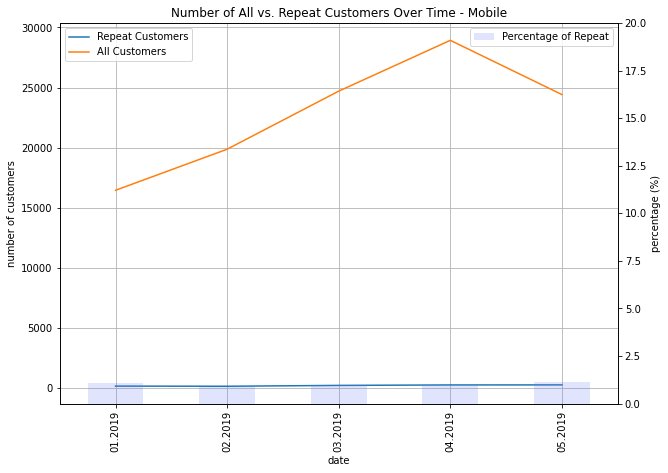

In [78]:
# Visualize all this data in a chart

ax = pd.DataFrame(monthly_repeat_customers_df_mob.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df_mob.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage_mob.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True, # add another y-axis on the rightside of the chart
    color=colors,
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time - Mobile')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')


ax2.set_ylim([0, 20])

plt.xticks(
    range(len(monthly_repeat_customers_df_mob.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df_mob.index], 
    rotation=45
)

plt.show()

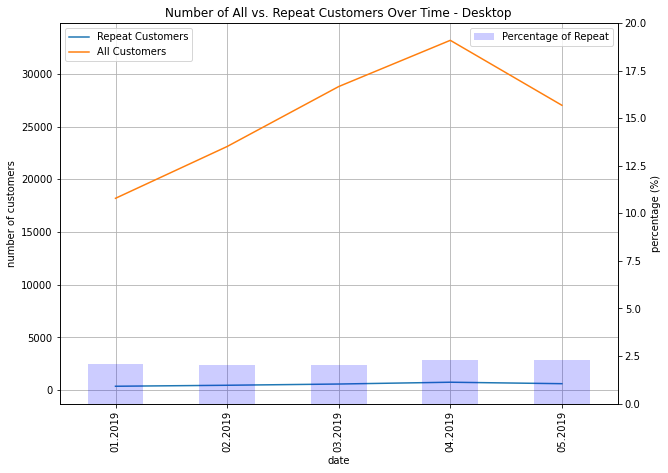

In [79]:
# Visualize all this data in a chart

ax = pd.DataFrame(monthly_repeat_customers_df_des.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df_des.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage_des.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True, # add another y-axis on the rightside of the chart
    color='blue',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time - Desktop')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')


ax2.set_ylim([0, 20])

plt.xticks(
    range(len(monthly_unique_customers_df_des.index)), 
    [x.strftime('%m.%Y') for x in monthly_unique_customers_df_des.index], 
    rotation=45
)

plt.show()

* Retention overall in dektop users makes up to 2.5% of the orders, the vast majority of orders were made by unique users
* Here we see a slight increase in the retained users on the desktop version more than mobile version
* It appears that retention is not high, maybe because it's only have been 5 months, we would have to re-assess after obtaning more data for a more insightfull results

#### Cohort Analysis


In [80]:
import datetime as dt
def get_month (x):
    return dt.datetime(x.year, x.month,1)

In [81]:
# Extracting orders data
orders = df[df['title'] == 'order']

In [82]:
# Convert time column to a timeseries data type
orders['time'] = pd.to_datetime(orders['time'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
# In this cell we get the first month the user made an order
orders['acquired_month'] = retention['time'].apply(get_month)
orders['cohort_month'] = orders.groupby('user_id').acquired_month.transform('min')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
# Extracting the month from both acquired and cohort dates
acq_month = orders['acquired_month'].dt.month
coh_month = orders['cohort_month'].dt.month

#This formula calculates the number of months the user have been retained
month_diff = (acq_month - coh_month)+1

In [85]:
# Cohort index column refers to how many months have the customer been retained
orders['cohort_index'] = month_diff
orders.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,user_id,product,site_version,time,title,target,acquired_month,cohort_month,cohort_index
60,072b030ba126b2f4b2374f342be9ed44,3c59dc048e8850243be8079a5c74d079,sports_nutrition,desktop,2019-03-03 10:15:41,order,1,2019-03-01,2019-03-01,1
106,f0935e4cd5920aa6c7c996a5ee53a70f,1c383cd30b7c298ab50293adfecb7b18,sneakers,desktop,2019-02-08 21:16:48,order,1,2019-02-01,2019-02-01,1
107,a97da629b098b75c294dffdc3e463904,1c383cd30b7c298ab50293adfecb7b18,clothes,desktop,2019-02-10 19:12:07,order,1,2019-02-01,2019-02-01,1
165,9766527f2b5d3e95d4a733fcfb77bd7e,d82c8d1619ad8176d665453cfb2e55f0,sports_nutrition,mobile,2019-02-06 10:32:36,order,1,2019-02-01,2019-02-01,1
179,8f53295a73878494e9bc8dd6c3c7104f,b53b3a3d6ab90ce0268229151c9bde11,accessories,mobile,2019-02-10 19:18:02,order,1,2019-02-01,2019-02-01,1


In [86]:
# Splitting the data by Site version.
Desktop_retention = orders[orders['site_version'] == 'desktop']
mobile_retention = orders[orders['site_version'] == 'mobile']

In [87]:
# Group unique costumer counts by month and index 
cohort_data_desktop = Desktop_retention.groupby(['cohort_month','cohort_index']).user_id.nunique().reset_index()
cohort_data_mobile = mobile_retention.groupby(['cohort_month','cohort_index']).user_id.nunique().reset_index()

In [88]:
cohort_data_desktop.head()

,cohort_month,cohort_index,user_id
0,2019-01-01,1,18193
1,2019-01-01,2,659
2,2019-01-01,3,330
3,2019-01-01,4,182
4,2019-01-01,5,118


In [89]:
# Creating cohort tables for both versions 
cohort_table_desktop = cohort_data_desktop.pivot(index = 'cohort_month', columns = 'cohort_index', values= 'user_id' )
cohort_table_mob = cohort_data_mobile.pivot(index = 'cohort_month', columns = 'cohort_index', values= 'user_id' )

# Converting values to percentages  
cohort_desk_per = cohort_table_desktop.divide(cohort_table_desktop.iloc[:,0],axis=0)
cohort_mob_perc = cohort_table_mob.divide(cohort_table_mob.iloc[:,0],axis=0)


In [90]:
cohort_desk_per.index = cohort_table_desktop.index.strftime('%B %Y')
cohort_mob_perc.index = cohort_table_mob.index.strftime('%B %Y')

<function matplotlib.pyplot.show(close=None, block=None)>

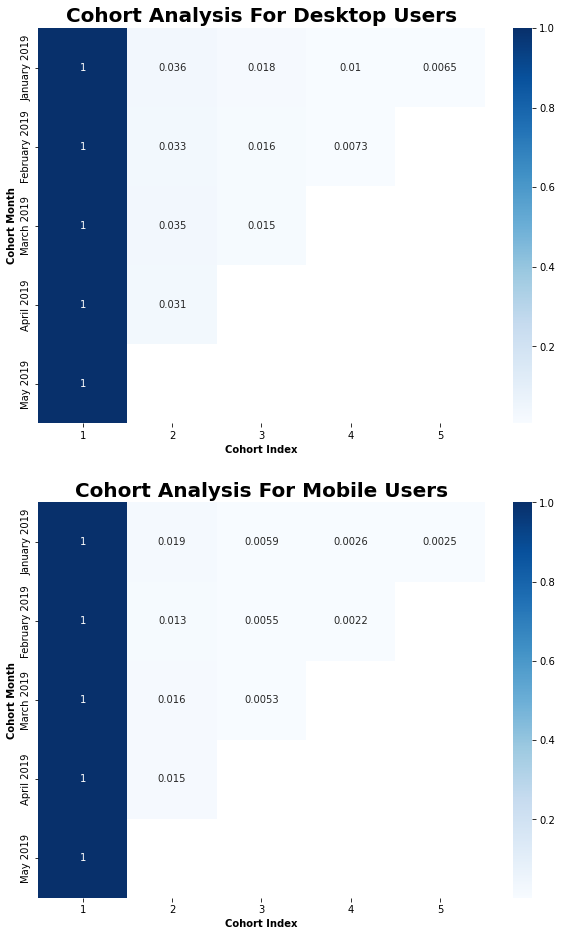

In [91]:
# Plotting cohort tables for both versions
plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
sns.heatmap(cohort_desk_per, annot= True, cmap= 'Blues')
plt.title("Cohort Analysis For Desktop Users", fontsize = 20, fontweight = 'bold')
plt.xlabel('Cohort Index',fontweight = 'bold')
plt.ylabel('Cohort Month',fontweight = 'bold')

plt.subplot(2,1,2)
sns.heatmap(cohort_mob_perc, annot= True, cmap= 'Blues')
plt.title("Cohort Analysis For Mobile Users", fontsize = 20, fontweight = 'bold')
plt.xlabel('Cohort Index',fontweight = 'bold')
plt.ylabel('Cohort Month',fontweight = 'bold')
plt.show

## <img src="https://www.svgrepo.com/show/64928/switch.svg" style="width:30px; align:left;margin:0px 20px 0px 0px;"> Part II - A/B Test<a class="anchor" id="Testing"></a> 
<br>

$$H_0 : P_{mob} \leq P_{desk}$$
$$H_1 : P_{mob} > P_{desk}$$

- Assume under the null hypothesis, pmob and pdesk both have "true" success rates equal to the converted success rate regardless of page - that is pmob and pdesk <br>
  are equal. Furthermore, assume they are equal to the converted rate in original data regardless of the version.

  Use a sample size for each page equal to the ones in in the data provided <br>
  Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null. 

In [92]:
ab = df.copy()

desk = ab[ab['site_version'] == 'desktop']
mob = ab[ab['site_version'] == 'mobile']

In [93]:
mob = mob.sample(n=2382885, replace = False)

In [94]:
pmob = mob.target.value_counts('target')[1]
pmob

0.018948879194757615

In [95]:
pdesk = desk.target.value_counts('target')[1]
pdesk

0.055890653556508185

In [96]:
nmob = mob.site_version.value_counts()[0]
nmob

2382885

In [97]:
ndesk = df.site_version.value_counts()[1]
ndesk

2382885

**We will simulate 10,000 pmob - pdesk . Store all 10,000 values in a numpy array called p_diffs.**

In [98]:
observed_diff = mob.target.mean() - desk.target.mean()
observed_diff

-0.03694177436175057

Text(0, 0.5, 'number of samples')

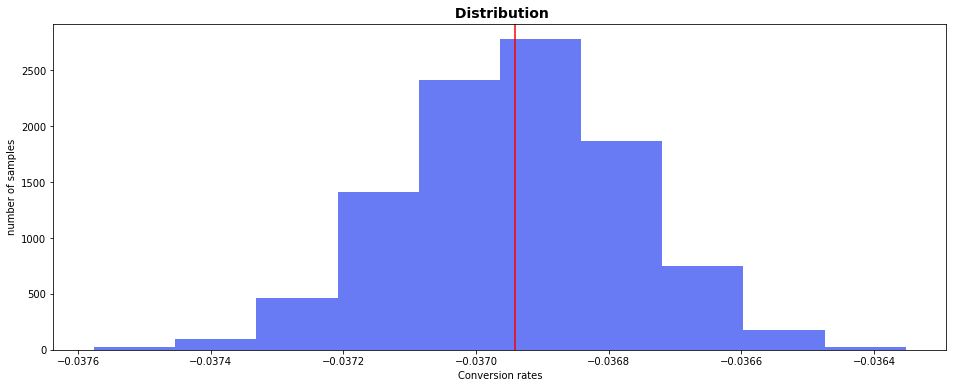

In [99]:
mob_binomial_c = np.random.binomial(nmob, pmob,10000)/nmob
desk_binomial_c = np.random.binomial(ndesk , pdesk, 10000)/ndesk

p_diff_bi = mob_binomial_c - desk_binomial_c

plt.figure(figsize = (16,6))
plt.hist(p_diff_bi,color = color_blue)
plt.axvline(observed_diff, c= 'red')
plt.title(' Distribution', fontweight = 'bold', fontsize= 14)
plt.xlabel('Conversion rates')
plt.ylabel('number of samples')

In [100]:
diff_std = np.std(p_diff_bi)
diff_std

0.0001709519427008706

Text(0, 0.5, 'number of samples')

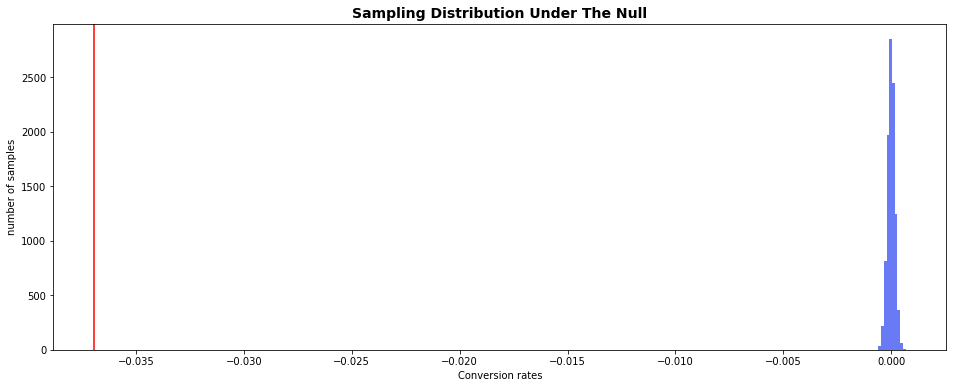

In [101]:
null = np.random.normal(0,diff_std, p_diff_bi.shape[0] )
plt.figure(figsize = (16,6))
plt.hist(null, color= color_blue);
plt.axvline(x=observed_diff , c='red')
plt.title('Sampling Distribution Under The Null', fontweight = 'bold', fontsize= 14)
plt.xlabel('Conversion rates')
plt.ylabel('number of samples')

In [102]:
#P value
(null > observed_diff).mean()

1.0

>**We fail to reject null hypothesis as the P value is larger than the significance value  α=0.05**

>Under the $H_0$ We computed the probability of observing a point of data as or more extreme than the observed diff between $P_{mob} - P_{desk}$ ; hence, the mobile version conversion rate is not higher than that of desktop page

In [103]:
import statsmodels.api as sm

convert_desk = desk.target.mean()
convert_mob = mob.target.mean()
n_desk = desk.shape[0]
n_mob = mob.shape[0]

In [104]:
z_score , p_value = sm.stats.proportions_ztest([convert_mob , convert_desk], [n_mob , n_desk], alternative= 'larger')

print(f'Z score = {z_score}''\n' f'P value is = {p_value}')

Z score = -0.1350368258796935
P value is = 0.5537086209313481


1. **A negative Z score means that the data point is below the average.** <br>
2. **The $P_{value}$ is way above the $\alpha$ value, which means that we failed to reject the null hypothesis.**<br>

The conversion rate for desktop version is better than that in the mobile version

## Conclusion & Recommendations <a class="anchor" id="recommendations"></a>

**1. Clicks & Purchase Trends:**<br>
   * The number of clicks increased significantly from March 2019 and had their peak towards June 2019. In cases like this, it's really usefull to take a look     at historical data, so we can be sure whether this increase is due to growth or it's just a Seasonality effect.
   * Around Feb 2019, increased clicks on Company banner are observed, the peak exists in both versions, but it's much more prominant in the desktop version.<br><br>

Conversion rate on desktop is higher in general; sneakers conversions are higher than that in the desktop version & clothes conversions are the highest in both versions
   
**2. Seasonality:** <br>
* Conversion rates reaches a peak for both versions at the month of Feb, the decrease is steeper in the case of desktop users towards Mar. conversion rate increase again at the month of Apr for both versions, but it's more prominent in mobile version users. 
* We can invest more in campaigns during Feb and Apr to maximize sales and take advantage of the trends
* Products like clothes and sneakers are selling the most in both versions, so we could make offers on these products when appropriate to achieve higher sales and greater growth
 <br><br>
 
**3. Retargeting Time Frame:** <br>
* Most of the users take from 0 to 3 days to convert. during which, retargeting campaigns would be appropriate to help reducing consideration time and hence,increasing conversion rate. 
<br><br>

**4. Which Banner Show / Click Is Driving More Conversions:** <br>
* As we see here that **banner_show_on_company** and **banner_show_on_clothes** are strongly associated with users conversion on **clothing products**
* The darker the color in the heatmap, the stronger the association between the actions, for example **banner_show_on_company** also is associated with ordering **sneakers.**
* From Parallel Coordinates Plot we notice that all banner shows of different products lead to a clothing item purchase
* The Company banner show is the most banner that is leading to  purchases of a clothing item
<br><br>

**5. Retention & Cohort Analysis:** <br>
* Retention overall in dektop users makes up to 2.5% of the orders, the vast majority of orders were made by unique users.
* we see a slight increase in the retained users on the desktop version more than mobile version.
* It appears that retention is not high, maybe because it's only have been 5 months, we would have to re-assess after obtaning more data for a more insightful results.
<br><br>

**6. A/B Test:** <br>
1. A negative Z score means that the data point is below the average.<br>
2. The $P_{value}$ is way above the $\alpha$ value, which means that we failed to reject the null hypothesis.<br>

**The conversion rate for desktop version is better than that in the mobile version**
<br><br>

**Other recommendations:** <br>

   
   * Push  offers in the months of Feb and Apr.
   * Push offers on Mid Weekdays.
   
